# Scipy optimize

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.optimize import leastsq
from scipy.optimize import least_squares

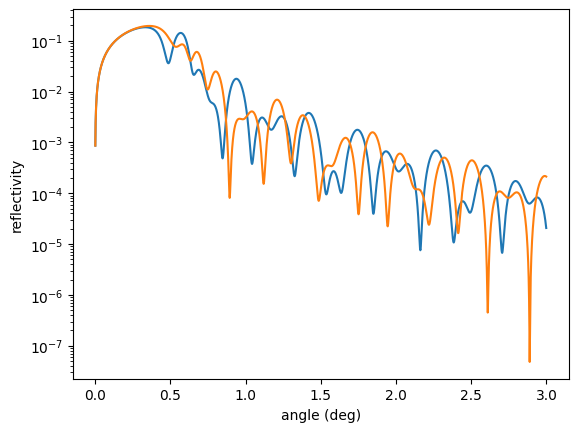

In [2]:
material_Fe = nx.Material.Template(nx.lib.material.Fe_enriched)

lay_Fe = nx.Layer(id = "Fe layer",
                  material = nx.Material.Template(nx.lib.material.Fe_enriched),
                  thickness = 10,
                  roughness = 0.1)

lay_Pt = nx.Layer(id = "Pt layer",
                  material = nx.Material.Template(nx.lib.material.Pt),
                  thickness = 15,
                  roughness = 0.1)

sub_Si = nx.Layer(id = "Si substrate",
                  material = nx.Material.Template(nx.lib.material.Si),
                  thickness = nx.inf,
                  roughness = 0.1)

sample = nx.Sample(id = "simple layers",
                   layers = [lay_Fe, lay_Pt, sub_Si],
                    geometry = "r",
                    length = 10,
                    roughness = "a")

beam  = nx.Beam(fwhm = 0.2)

exp = nx.Experiment(beam = beam,
                    objects = sample,
                    id = "my exp")

angles = np.arange(0.001, 3, 0.001)

reflectivity = nx.Reflectivity(experiment = exp,
                               sample = sample,
                               energy = nx.lib.energy.CuKalpha,  # Cu K alpha line
                               angles = angles,
                               resolution = 0.001)

reference_ref = reflectivity()

# start values for initial guess
lay_Fe.thickness = 7.3
lay_Pt.thickness = 18.9

# initial guess vector
p0 = [lay_Fe.thickness.value, lay_Pt.thickness.value]

ref = reflectivity()

plt.semilogy(angles, reference_ref)
plt.semilogy(angles, ref)
plt.xlabel('angle (deg)')
plt.ylabel('reflectivity')
plt.show()

[10. 15.] 4


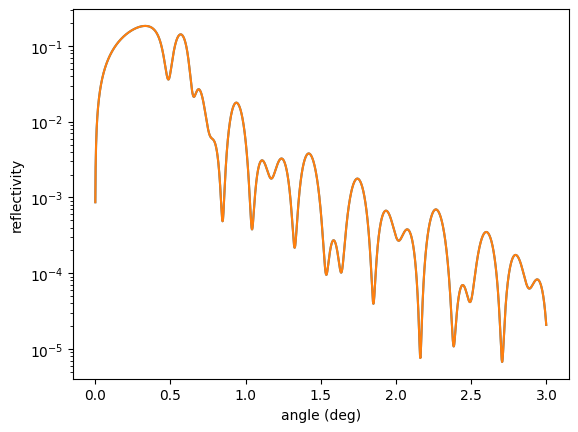

In [3]:
# via scipy.optimize.leastsq

# definition of the optimization problem
def errorfunc(p,z):
    lay_Fe.thickness = p[0]
    lay_Pt.thickness = p[1]
    return reflectivity() - z

# setup least squares optimization
solp, ier = leastsq(errorfunc, 
                    p0,
                    args=(reference_ref),
                    Dfun=None,
                    full_output=False,
                    ftol=1e-15,
                    xtol=1e-15,
                    maxfev=100000,
                    epsfcn=1e-20,
                    factor=1)

print(solp, ier)

plt.semilogy(angles, reference_ref)
plt.semilogy(angles, reflectivity())
plt.xlabel('angle (deg)')
plt.ylabel('reflectivity')
plt.show()

[10.00000001 14.99999977]


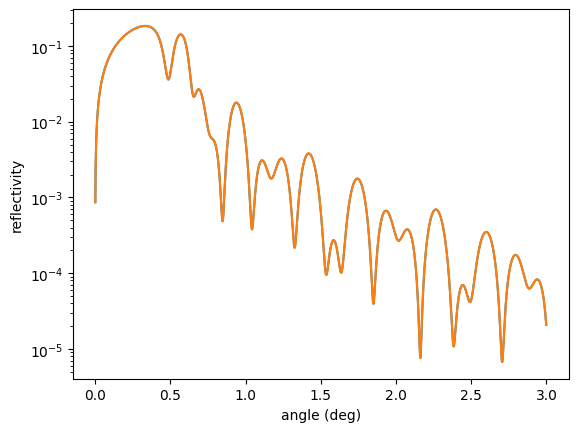

In [4]:
# via scipy.optimize.least_squares

# definition of the optimization problem
def errorfunc(p,z):
    lay_Fe.thickness = p[0]
    lay_Pt.thickness = p[1]
    return reflectivity() - z

# setup least squares optimization
res = least_squares(errorfunc, 
                    p0,
                    args=([reference_ref]),
                    ftol=1e-15,
                    xtol=1e-15)

print(res.x)

plt.semilogy(angles, reference_ref)
plt.semilogy(angles, reflectivity())
plt.xlabel('angle (deg)')
plt.ylabel('reflectivity')
plt.show()

[ 9.99999996 14.99999976]


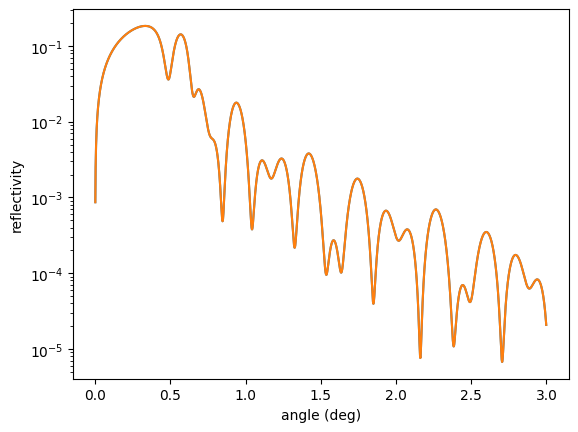

In [5]:
# via scipy.optimize.minimize

# start values for initial guess again
lay_Fe.thickness = 7.3
lay_Pt.thickness = 18.9

# initial guess vector
x0 = [lay_Fe.thickness.value, lay_Pt.thickness.value]

def errorfunc(p,z):
    lay_Fe.thickness = p[0]
    lay_Pt.thickness = p[1]
    return np.sum(np.square(reflectivity() - z))

res = minimize(errorfunc,
               x0,
               args = (reference_ref),
               method = 'Nelder-Mead',
               tol = 1e-6)

print(res.x)

plt.semilogy(angles, reference_ref)
plt.semilogy(angles, reflectivity())
plt.xlabel('angle (deg)')
plt.ylabel('reflectivity')
plt.show()